In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#어렵구요... 이거 몬말 ? ? \ㅇㅂㅇ/

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0, '시간(분)')

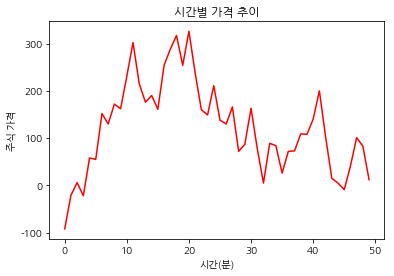

In [22]:
# 롸 \ㅇㅂㅇ/?

import numpy as np
data = np.random.randint(-100, 100, 50).cumsum()
data
plt.plot(range(50), data, 'r')
mpl.rcParams['axes.unicode_minus'] = False
plt.title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')

In [13]:
df_fitness = pd.read_csv("/home/pirl/Downloads/data2_py/FITNESS.csv",encoding='CP949')

In [14]:
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [15]:
df_currency = pd.read_csv("/home/pirl/Downloads/data2_py/환율.csv", encoding='CP949')

In [16]:
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


## 그래프분석 (연습)
### 운동에 따른 혈당 산소 요구량 데이터.

성별, 연령대 별로 Bar Chart 를 그리고 결과를 해석하시오.

In [25]:
df_fitness = pd.read_csv("/home/pirl/Downloads/data2_py/FITNESS.csv",encoding='CP949') #encoding : 한글 깨짐 방지?
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


#### Bar Chart 생성

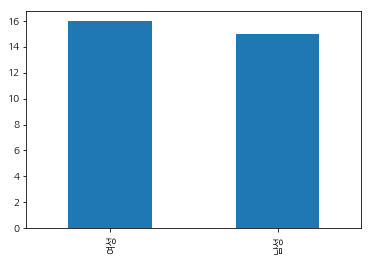

In [65]:
#성별 Bar Chart

df_count=df_fitness['GENDER'].value_counts()
df_count.plot.bar()

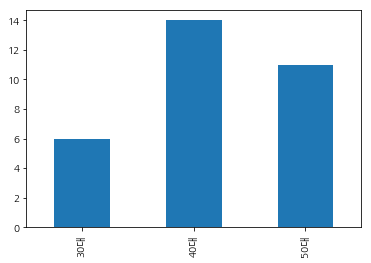

In [28]:
#연령대별 Bar Chart

df_count=df_fitness['AGEGROUP'].value_counts()
df_count.sort_index(inplace=True) #연령대 순으로 정렬
df_count.plot.bar()

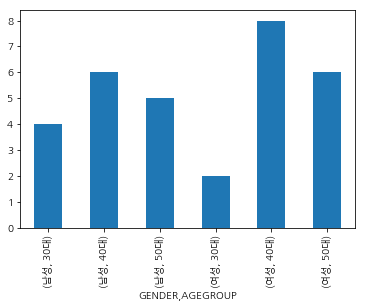

In [33]:
#성별+연령대별 Bar Chart

#as_index=False : 그룹이 index로 들어간다.
df_groupby_total=df_fitness.groupby(['GENDER',"AGEGROUP"], as_index=False).size()
df_groupby_total.plot.bar()

### 결과 해석

1. 성별에서 여성이 남성보다 빈도가 많으나 큰 차이는 없다.
2. 연령별에서 40대의 자료 빈도가 가장 많고 30대가 가장 적다.
3. 성별과 연령별 자료에서는 (여성,40대)의 빈도가 가장 많고 (여성,30대)의 빈도가 가장 적다.

### 운동에 따른 혈당 산소 요구량 데이터.

Histogram을 생성하고 결과를 해석하시오.

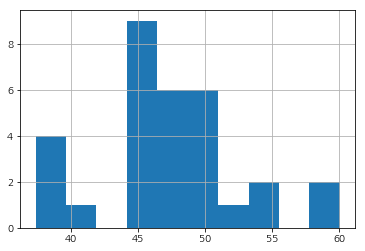

In [34]:
#OXY에 대한 히스토그램 생성

df_fitness['OXY'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f97e90b8>,
      dtype=object)

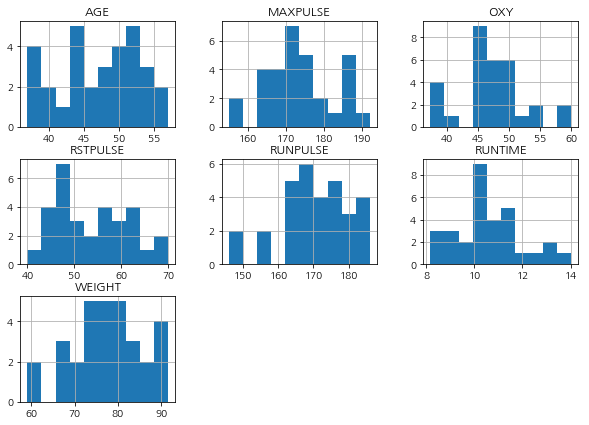

In [35]:
df_fitness.hist(figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f940c860>,
      dtype=object)

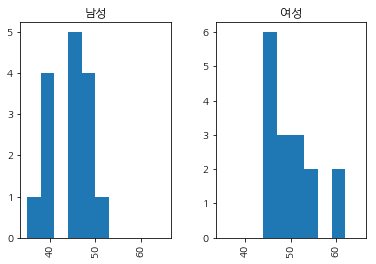

In [36]:
#성별로 OXY의 빈도의 분포 확인
df_fitness.hist(column='OXY', by='GENDER',range=(35,65))

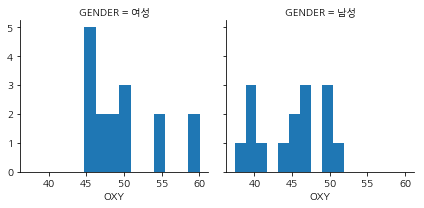

In [67]:
grid=sns.FacetGrid(df_fitness, col='GENDER')
grid.map(plt.hist, 'OXY')

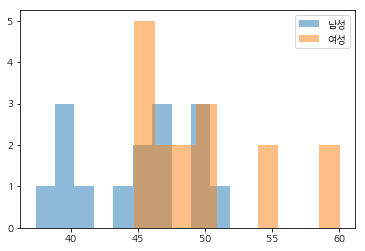

In [38]:
#성별 혈당 산소 요구량 중첩
plt.hist(df_fitness[df_fitness['GENDER'] == '남성']['OXY'],label='남성',alpha=0.5)
plt.hist(df_fitness[df_fitness['GENDER'] == '여성']['OXY'],label='여성',alpha=0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

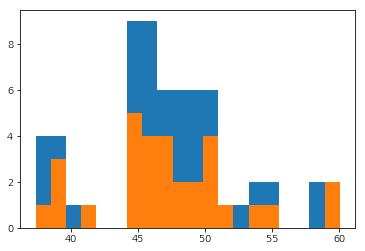

In [41]:
#x축의 구간(bin)수를 변경

plt.hist(x='OXY', data=df_fitness)
plt.hist(x='OXY', data=df_fitness,bins=20)

#bins 50으로도 해보자!

### 운동에 따른 혈당 산소 요구량 데이터
성별+연령대 혈당 산소 요구량(OXY)의 분포 및 이상치 포함 여부를 Box Plot 으로 그리고, 결과를 해석하시오.

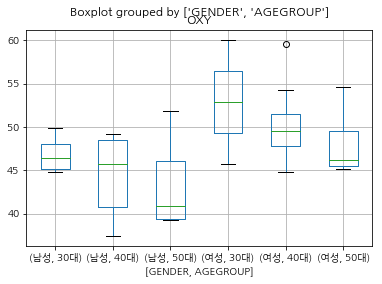

In [42]:
df_fitness.boxplot(column='OXY', by=['GENDER','AGEGROUP'])

#### 결과해석
* 여성이 남성보다 수준이 높고, 연령대가 증가할 수록 수준이 낮아지는 경향이 있다.

### 운동에 따른 혈당 산소 요구량 데이터
성별, 성별+연령대 자료 수를 Pie Chart로 생성하고 결과를 해석하시오.

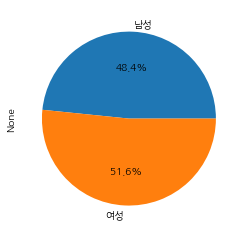

In [43]:
#성별 파이차트

df_count=df_fitness.groupby(['GENDER']).size()
df_count.plot.pie(y='OXY', autopct='%.1f%%')

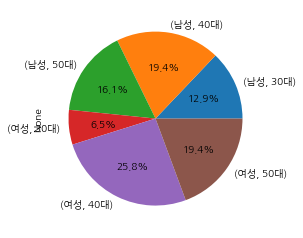

In [62]:
#성별+연령대별 파이차트

df_count=df_fitness.groupby(['GENDER','AGEGROUP']).size()
df_count.plot.pie(y='OXY',autopct='%.1f%%')

#### 결과해석
1. 남성과 여성은 비율에 차이가 거의 없다.
2. (여성,40대)의 비율이 가장 높고, (여성,30대)의 비율이 가장 낮다.

### 운동에 따른 혈당 산소 요구량 데이터
성별, 운동시간과 혈당 산소요구량간의 관계를 Scatter Plot으로 생성하고 결과를 해석하시오.

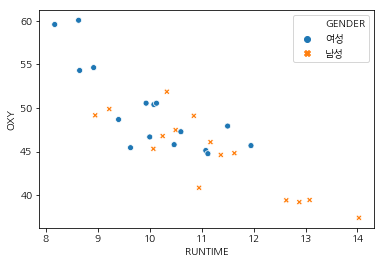

In [45]:
sns.scatterplot(x='RUNTIME', y='OXY',hue='GENDER',style='GENDER', data=df_fitness)

#### 결과해석
* 운동시간이 증가하면서 혈당 산소 요구량을 감소하고 있다. 이는 남녀 구분없이 동일하게 나타나는 현상이다.

#### Scatter Matrix

전체 연속형 변수 또는 혈당산소 요구량에 대한 맥박(운동),맥박(최대),운동시간간의 관계를 scatter matrix로 생성하고 결과를 해석하시오.

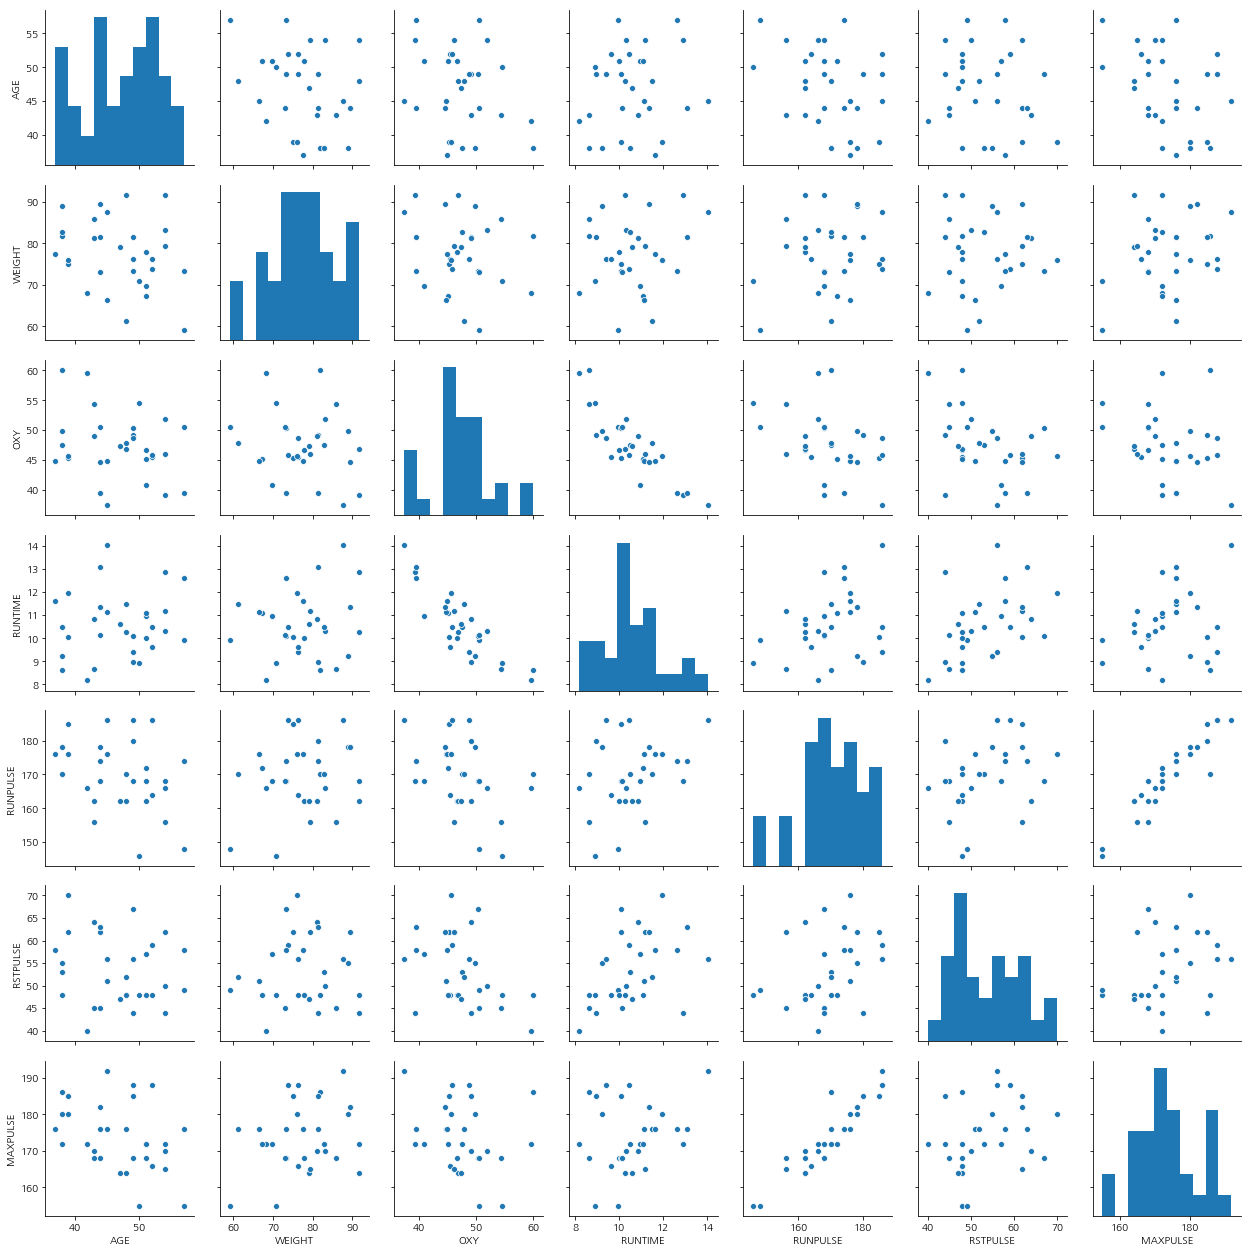

In [46]:
sns.pairplot(df_fitness)

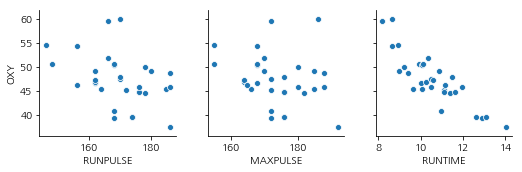

In [48]:
sns.pairplot(df_fitness, y_vars=['OXY'], x_vars=['RUNPULSE','MAXPULSE','RUNTIME'])

#### 결과해석
맥박(운동)과 맥박(최대)등 변수 간의 선형관계를 확인할 수 있고 혈당 산소 요구량은 운동시간과 반비례 관계가 있음

### 중국, 일본, 미국의 환율 데이터
통화(CURRENCY)별로 월별 매매 기준율의 변화를 Trend Chart로 생성하고 결과를 해석하시오.

In [49]:
df_currency = pd.read_csv("/home/pirl/Downloads/data2_py/환율.csv", encoding='CP949')
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


In [50]:
#pivot을 활용하여 각국 통화별 데이터를 생성

df_curreny_pivot = df_currency.pivot(index='APPL_DATE', columns='CURRENCY', values='STD_RATE')
df_curreny_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
20160101,181.48,976.99,1178.0
20160102,181.48,976.99,1178.0
20160103,181.48,976.99,1178.0
20160104,181.10,992.62,1184.0
20160105,181.94,993.00,1185.0


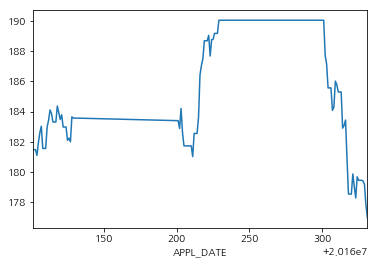

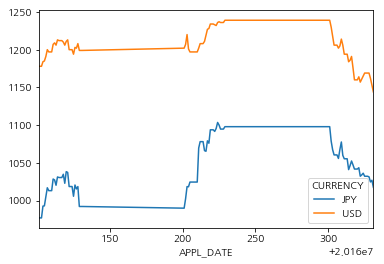

In [51]:
#중국 위엔화 별도 그림(엔화, 달러와 단위 차이때문!)

df_curreny_pivot['CNY'].plot()

#일본 엔화, 미국 달러
df_curreny_pivot[['JPY','USD']].plot()

#### 결과해석
엔화와 달러는 비슷한 변화 패턴을 보이나 위엔화는 추세가 다르다.

### 운동에 따른 혈당 산소 요구량 데이터
성별, 연령대별 혈당 산소 요구량 현황을 Heatmap을 생성하고 결과를 해석하시오.

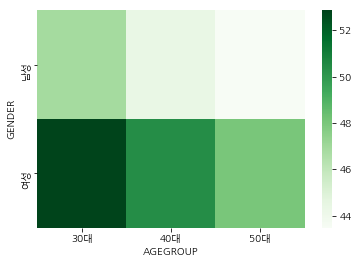

In [54]:
df_agg = df_fitness.groupby(['GENDER','AGEGROUP'],as_index=False).agg('mean')
df_pivot = df_agg.pivot('GENDER','AGEGROUP','OXY')
sns.heatmap(df_pivot, cmap='Greens')

#### 결과해석
여성,남성 모두 연령대가 낮을수록 산소 요구량이 높으며, 그 평균 수준은 여성이 남성보다 높다.

### 운동에 따른 혈당 산소 요구량 데이터
운동시간과 혈당 산소 요구량으로 Contour Plot을 생성하고 결과를 해석하시오.

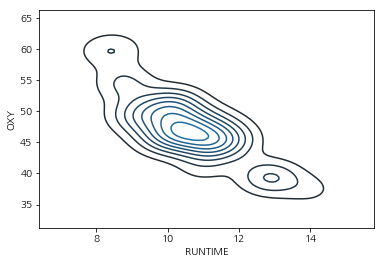

In [55]:
sns.kdeplot(df_fitness['RUNTIME'], df_fitness['OXY'],shade=False)

#### 결과해석
혈당 산소 요구량은 (45~50), 운동시간은 (10~12) 범위에 많이 분포되어 있다.

### 운동별 혈당 산소 요구량 데이터
성별에 따른 혈당 산소 요구량, 몸무게, 휴식 맥박수의 관계를 Parallel Plot을 생성하고 결과를 해석하시오.

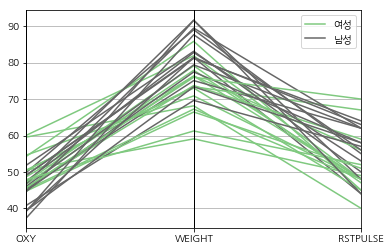

In [57]:
pd.plotting.parallel_coordinates(df_fitness, 'GENDER', cols=['OXY','WEIGHT','RSTPULSE'], colormap='Accent')

#### 결과해석
남성은 여성에 비해 몸무게와 휴식맥박수는 높은 수준이지만 혈당 산소 요구량은 반대로 낮은 수준이다.

### 운동에 따른 혈당 산소 요구량 데이터 : Dashboard 작성
histogram, pie chart, trend chart, scatter plot 을 이용한 Dashboard를 생성하시오.

Text(486.5477272727271, 0.5, '혈당 산소 요구량')

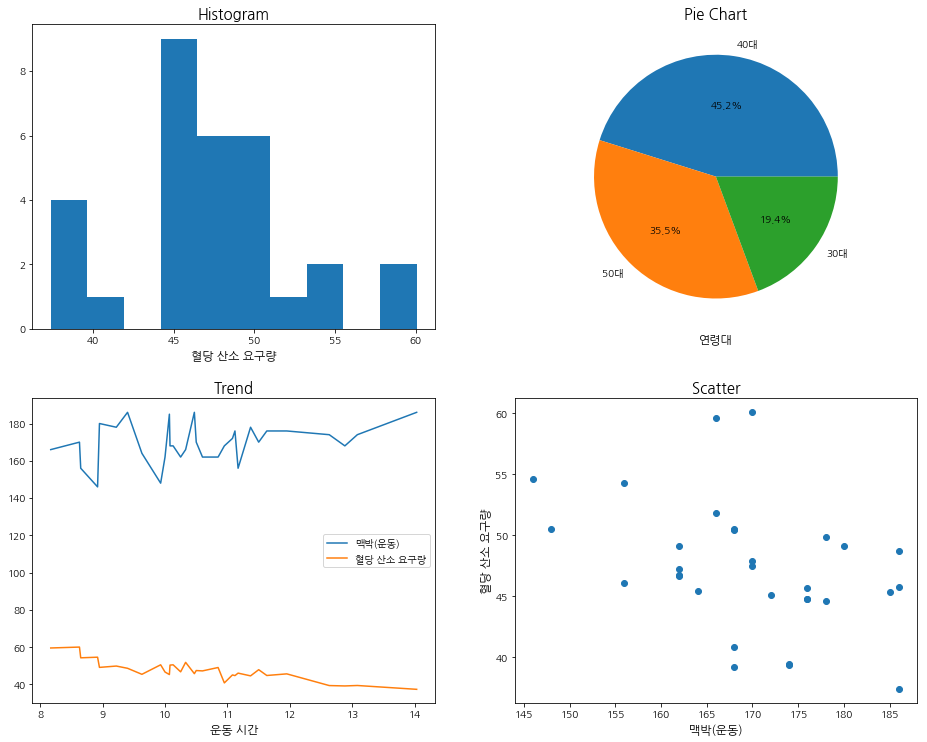

In [76]:
#파이차트를 위한 집계 데이터
df_count=df_fitness['AGEGROUP'].value_counts()

#(2,2): 4분할, 4개의 그래프 생성
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(13,10))
plt.tight_layout(w_pad=5, h_pad=5)


#히스토그램
axes[0,0].hist(df_fitness['OXY'])
axes[0,0].set_title('Histogram',fontsize=15)
axes[0,0].set_xlabel('혈당 산소 요구량',fontsize=12)

#파이차트
axes[0,1].pie(df_count, labels=df_count.index.tolist(), autopct='%.1f%%')
axes[0,1].set_title('Pie Chart',fontsize=15)
axes[0,1].set_xlabel('연령대',fontsize=12)

#트렌드차트
axes[1,0].plot('RUNTIME','RUNPULSE', data=df_fitness, label='맥박(운동)')
axes[1,0].plot('RUNTIME','OXY', data=df_fitness, label='혈당 산소 요구량')
axes[1,0].set_title('Trend',fontsize=15)
axes[1,0].set_xlabel('운동 시간',fontsize=12)
axes[1,0].legend()

#산점도
axes[1,1].scatter('RUNPULSE', 'OXY',data=df_fitness)
axes[1,1].set_title('Scatter',fontsize=15)
axes[1,1].set_xlabel('맥박(운동)',fontsize=12)
axes[1,1].set_ylabel('혈당 산소 요구량', fontsize=12)




다양한 종류의 그래프를 customizing(맞춤화)하고 동시에 비교하여 분석할 수 있는 Dashboard 생성

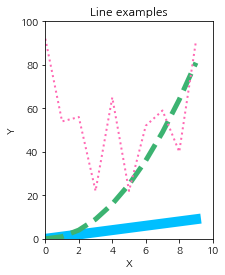

In [77]:
###
###
### 1. 예제 생성하기
np.random.seed(9)
xpoints = np.arange(10)
ypoints = [np.arange(10),
           np.arange(10)**2,
           np.random.choice(100, size=10)]

### 2. 선 옵션 설정하기
styles = ['-', '--', ':']
colors = ['deepskyblue', 'mediumseagreen', 'hotpink']
widths = [10, 5, 2]

### 3. 선 그래프 그리기
plt.figure(figsize=(3,4))     # 그래프 크기(단위 inch)
for i in range(len(ypoints)):
    plt.plot(xpoints, ypoints[i],
             linestyle=styles[i],   # 선 모양
             color=colors[i],       # 선 색상
             linewidth=widths[i])   # 선 굵기

### 4. 그래프 옵션 설정하기
plt.title("Line examples")    # 그래프 제목
plt.xlabel("X")               # x축 이름
plt.ylabel("Y")               # y축 이름
plt.xlim([0,10])              # x축 최소최대값
plt.ylim([0,100])             # y축 최소최대값

### 5. 그래프 그림 저장하기
plt.savefig("lineexamples.png", dpi=350)

### 6. 그래프 화면에 출력하기
plt.show()